In [120]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [121]:
#datasets

dataset = 'model/keypoint_classifier/keypoint.csv'
train_ratio = 0.80
test_ratio = 0.20

X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))


y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=1-train_ratio, random_state=RANDOM_SEED)

In [122]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix for Sign Language',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('confusion_matrix.png')

In [123]:
model = load_model('model/keypoint_classifier/keypoint_classifier_new.h5')
pred_labels=[]
start_time = time.time()

pred_probabs = model.predict(X_test)
end_time = time.time()
pred_time = end_time - start_time
avg_pred_time = pred_time / X_test.shape[0]
print('Average prediction time: %fs' % avg_pred_time)

for pred_probab in pred_probabs:
    pred_labels.append(list(pred_probab).index(max(pred_probab)))

cm = confusion_matrix(y_test, np.array(pred_labels))


Average prediction time: 0.000047s


In [124]:
import math
conf=[]
for data in cm:
    cf=[]
    mean=math.fsum(cm[0])
    for d in data:
        d=float(d/mean)
        cf.append(round(d,2))
    conf.append(cf)
cff=np.array(conf)



Classification Report
---------------------------
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       112
           1       1.00      1.00      1.00        73
           2       0.91      0.97      0.94        99
           3       0.98      0.91      0.94        89
           4       0.89      1.00      0.94       116
           5       1.00      0.97      0.98        91
           6       1.00      0.95      0.97       101
           7       0.92      1.00      0.96       106
           8       1.00      1.00      1.00       105
           9       0.85      1.00      0.92       102
          10       1.00      1.00      1.00       111
          11       0.78      1.00      0.88        88
          12       0.90      1.00      0.95        74
          13       0.95      0.87      0.91        97
          14       0.99      1.00      1.00       100
          15       1.00      0.96      0.98       114
          16       0.74      

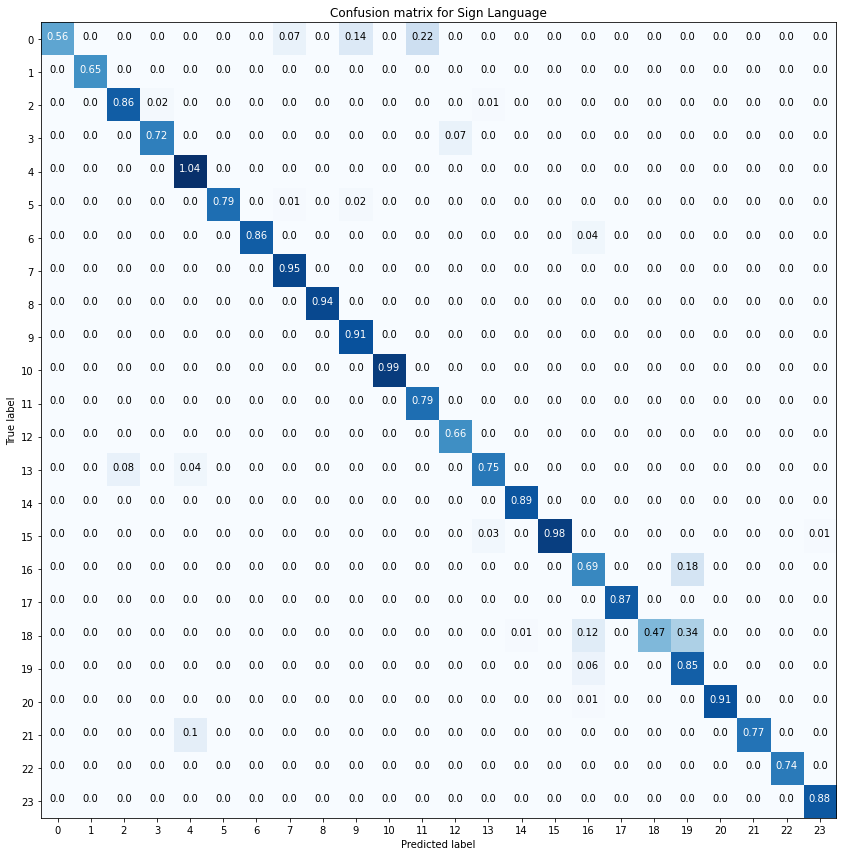

In [125]:
classification_report = classification_report(y_test, np.array(pred_labels))
print('\n\nClassification Report')
print('---------------------------')
print(classification_report)
plot_confusion_matrix(cff, range(0,24), normalize=False)
